In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [50]:
df = pd.read_excel("C:/Users/agamb/Desktop/premium preidction/dataset/premiums.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [51]:
df.shape

(50000, 13)

In [52]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [53]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [56]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [57]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [58]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [59]:
# use bracket notation for column names that contain spaces
df[df['number_of_dependants'] < 0]['number_of_dependants'].unique()

array([-3, -1])

In [60]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

## Numeric Columns

In [61]:
numeric_cols = df.select_dtypes(['float64','int64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

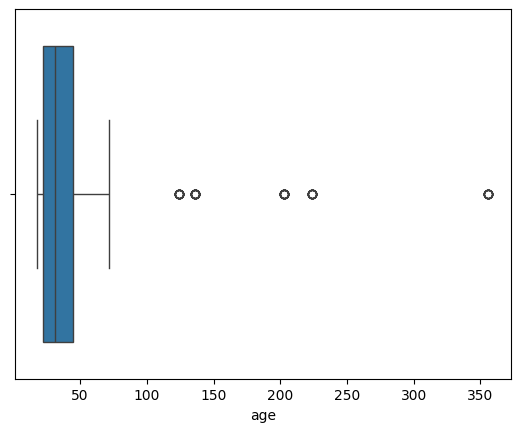

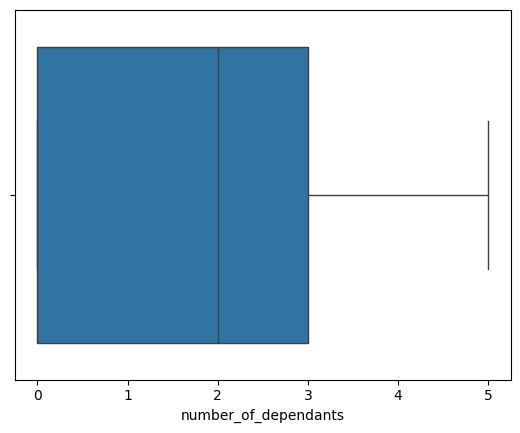

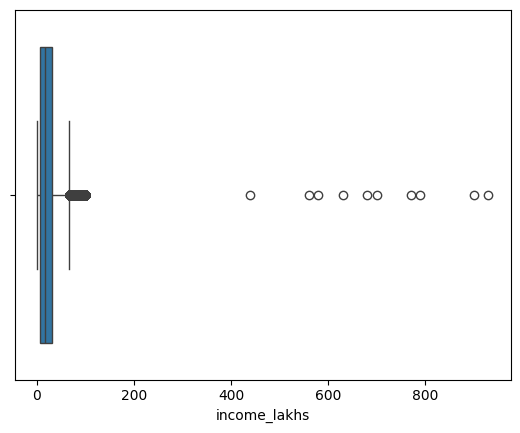

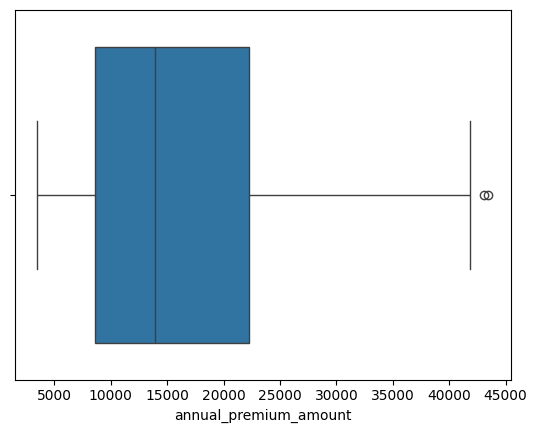

In [62]:
for col in numeric_cols:
  sns.boxplot(x=df[col])
  plt.show()

In [63]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [64]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


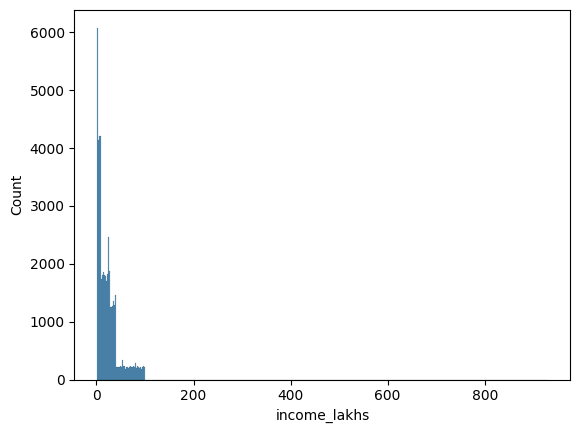

In [65]:
sns.histplot(df1.income_lakhs)
plt.show()

In [66]:
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q1 + 1.5 * IQR
  return upper_bound, lower_bound

In [67]:
get_iqr_bounds(df1.income_lakhs)

(43.0, -29.0)

In [68]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [69]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


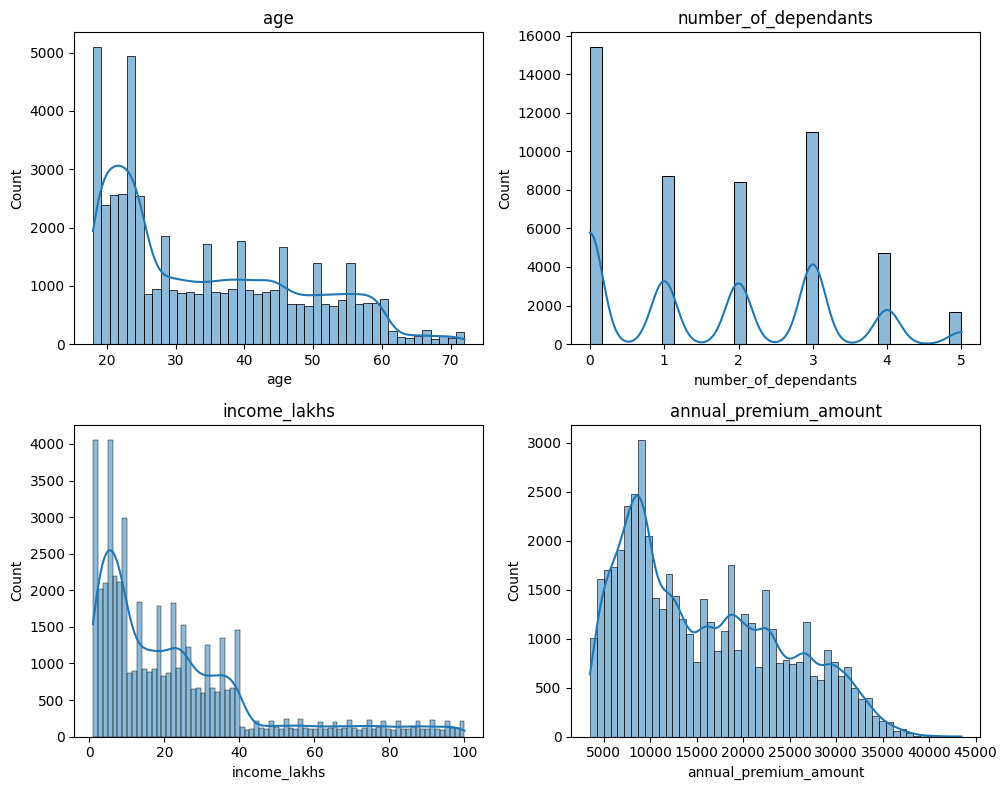

In [70]:
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
for i, column in enumerate(numeric_cols):
  ax = axs[i//2, i%2]
  sns.histplot(df2[column], kde=True,ax=ax)
  ax.set_title(column)
  
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

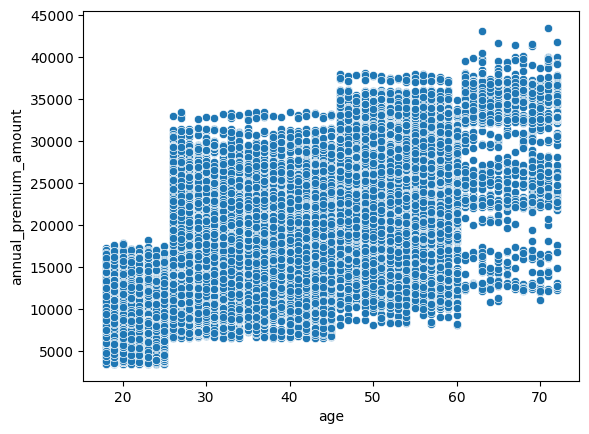

In [71]:
sns.scatterplot(df2, x='age',y='annual_premium_amount')

In [72]:
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

## Working on categorical columns now

In [73]:
for col in categorical_cols:
  print(col, ";", df2[col].unique())

gender ; ['Male' 'Female']
region ; ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ; ['Unmarried' 'Married']
bmi_category ; ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ; ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status ; ['Salaried' 'Self-Employed' 'Freelancer']
income_level ; ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ; ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ; ['Bronze' 'Silver' 'Gold']


In [74]:
df2['smoking_status'].replace({
  'Smoking=0': 'No Smoking',
  'Does Not Smoke': 'No Smoking',
  'Not Smoking': 'No Smoking'
},inplace=True)
df2['smoking_status'].unique()

C:\Users\agamb\AppData\Local\Temp\ipykernel_18988\3352917957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [75]:
pct_count = df2['gender'].value_counts(normalize=True)
pct_count

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

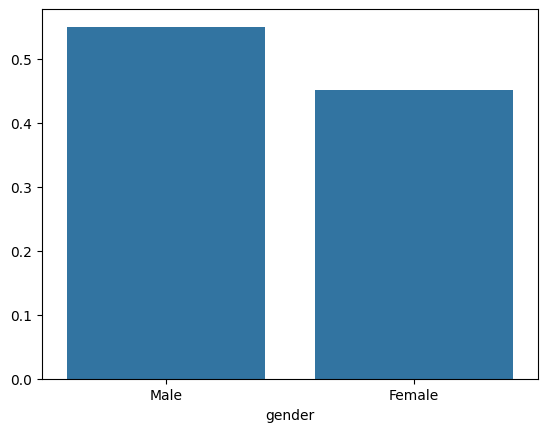

In [76]:
sns.barplot(x=pct_count.index,y=pct_count.values)

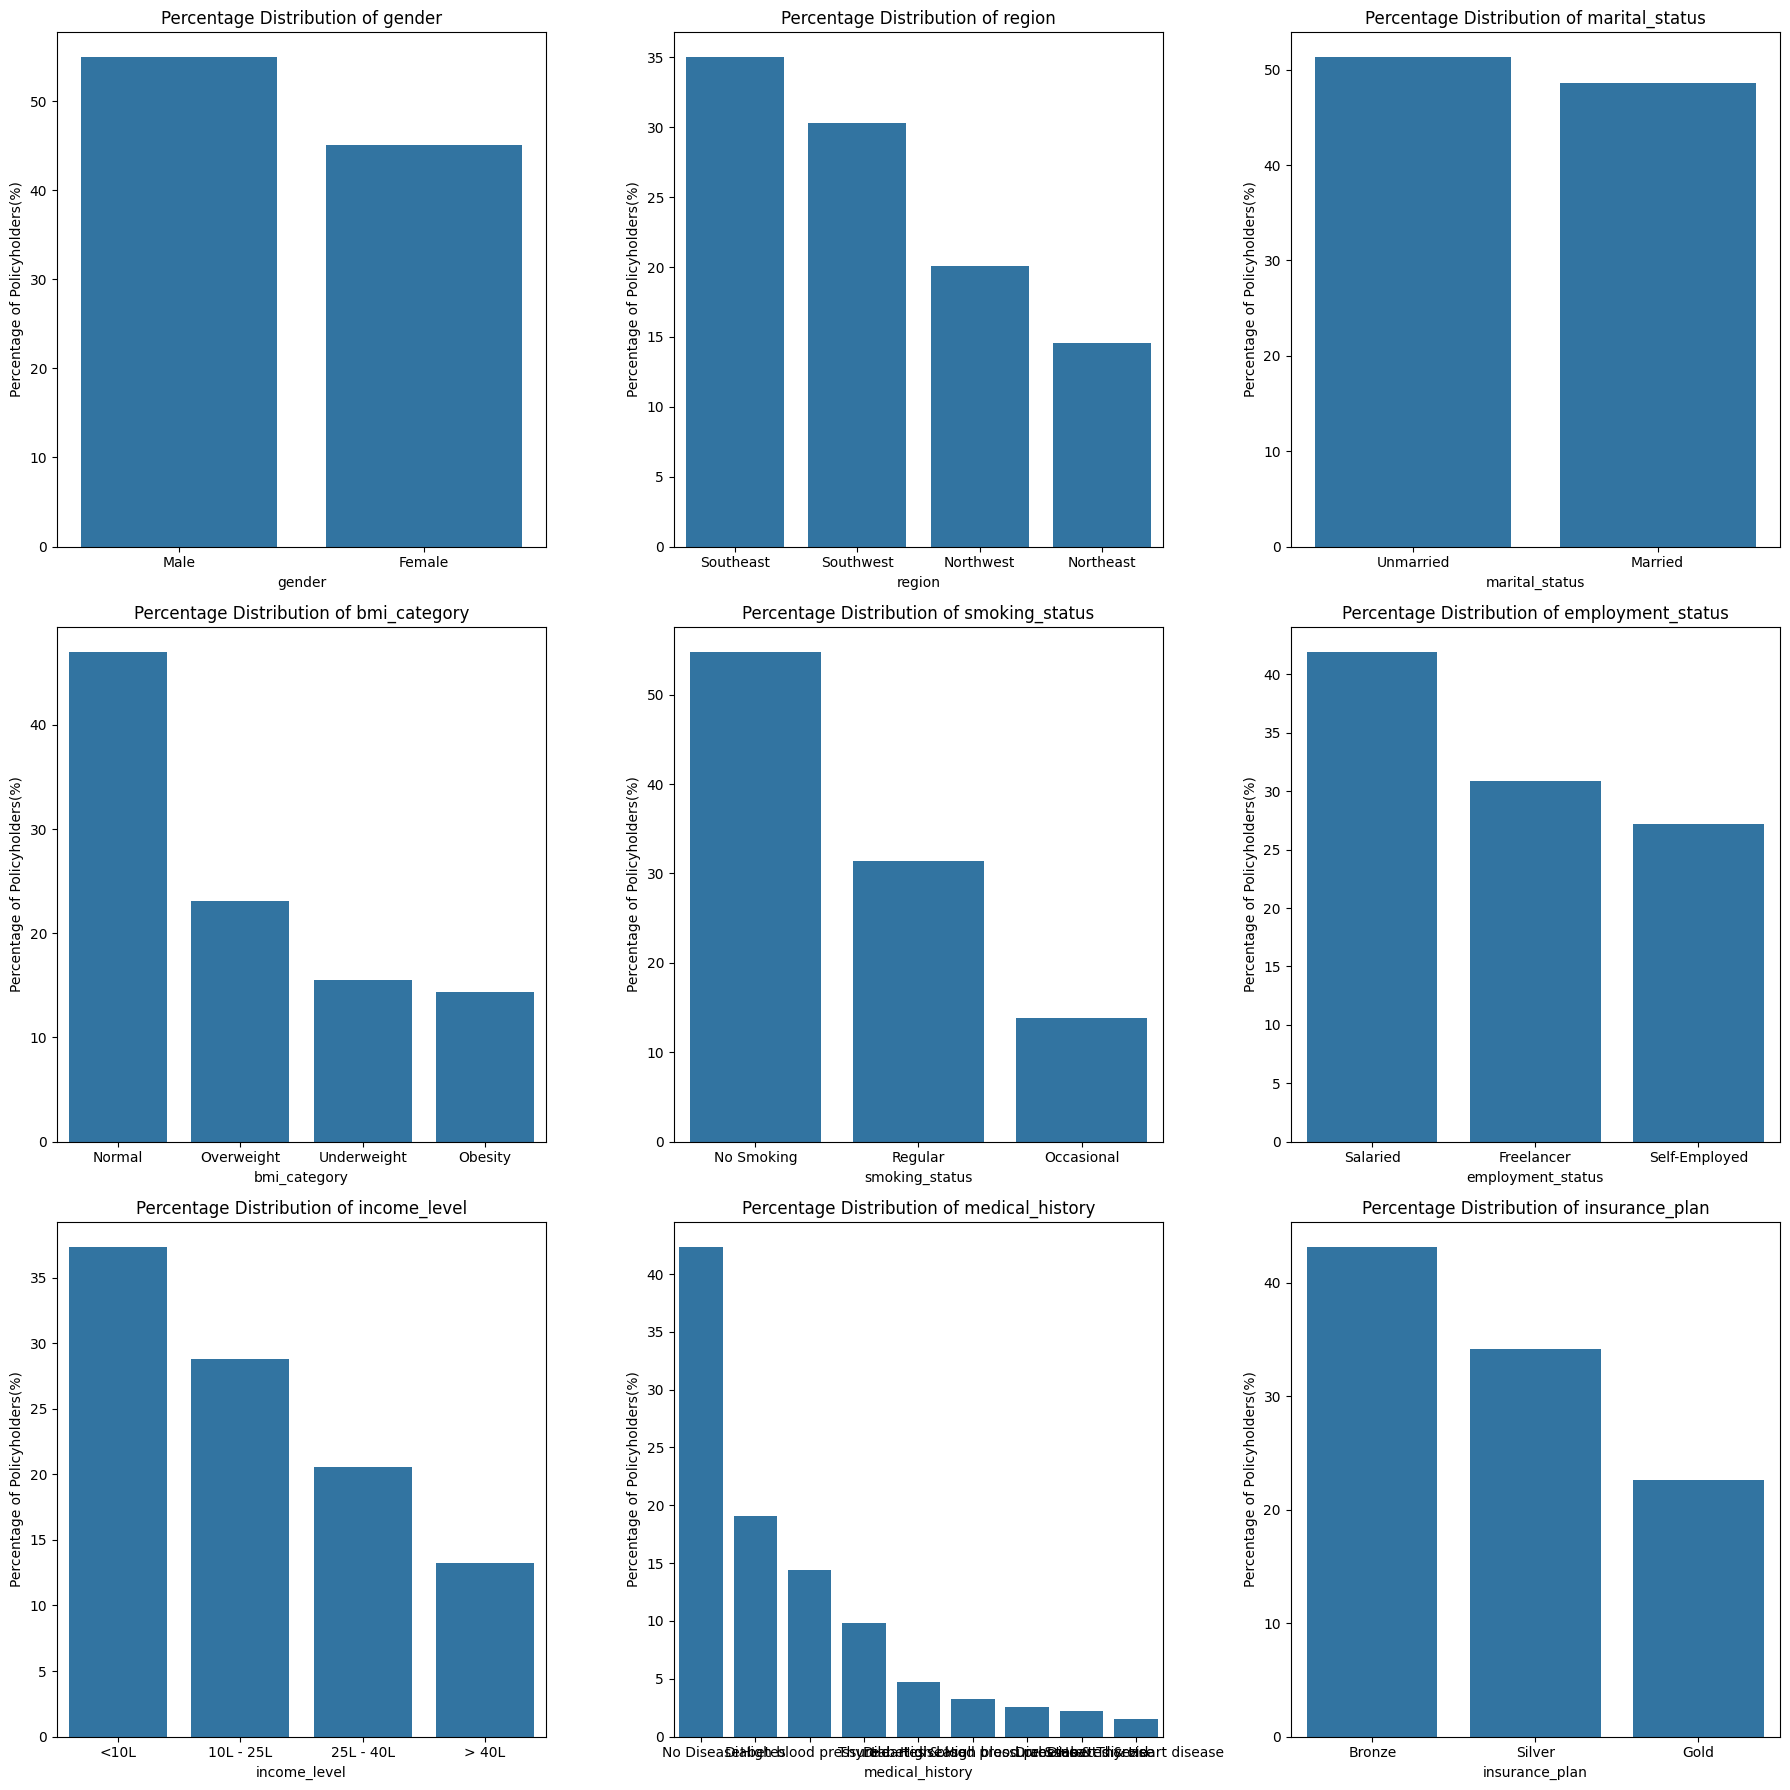

In [77]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()
for ax , column in zip(axes, categorical_cols):
  category_counts = df2[column].value_counts(normalize=True)*100

  sns.barplot(x=category_counts.index, y=category_counts.values,ax=ax)
  ax.set_title(f'Percentage Distribution of {column}')
  ax.set_ylabel(f'Percentage of Policyholders(%)')
  ax.set_xlabel(column)

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641


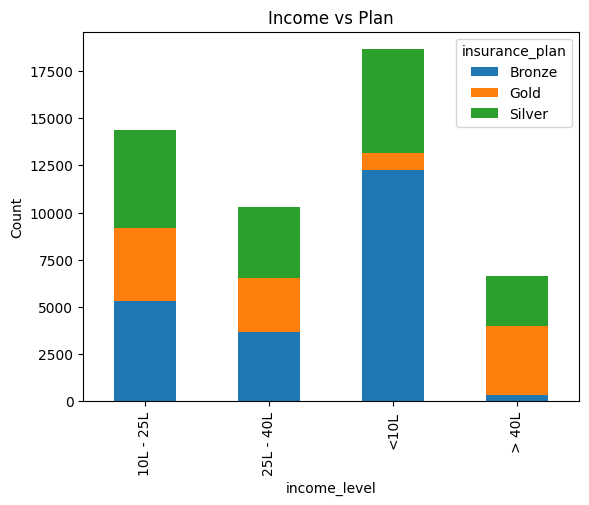

In [78]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar',stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

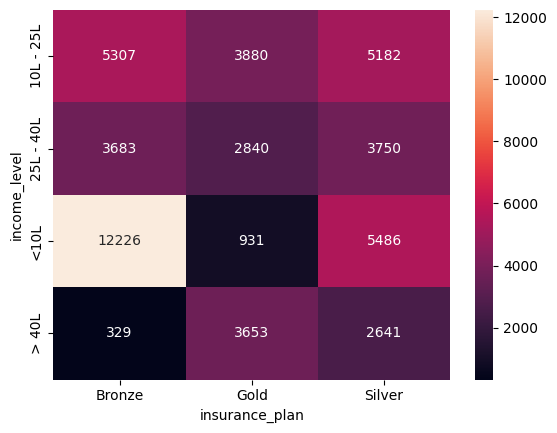

In [79]:
sns.heatmap(crosstab, annot=True,fmt='d')

## Feature engineering

In [80]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [81]:
risk_scores = {
  'diabetes' : 6,
  'heart disease' : 8,
  'high blood pressure' : 6,
  'thyroid' : 5,
  'no disease' : 0,
  'none' : 0
}
df2[['disease1','disease2']] = df2['medical_history'].str.split(" & ",expand=True).apply(lambda x : x.str.lower())

In [82]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
  df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()

C:\Users\agamb\AppData\Local\Temp\ipykernel_18988\4207662332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\agamb\AppData\Local\Temp\ipykernel_18988\4207662332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['income_level'] = le.fit_transform(df2['income_level'])
df2['income_level'].unique()

array([2, 0, 3, 1])

#### as label encoder works alphabetically 
#### 10L - 25L : 0 ,25L - 40L : 1 <10L : 2 , >40L : 3

In [84]:
df2.head()


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,2,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,2,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,0,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,3,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [86]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2['insurance_plan'].unique()


array([1, 2, 3])

In [87]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,2,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,2,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,0,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,3,77,No Disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571


In [88]:
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,2,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,2,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,0,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,3,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [90]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,2,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,2,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,0,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,3,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


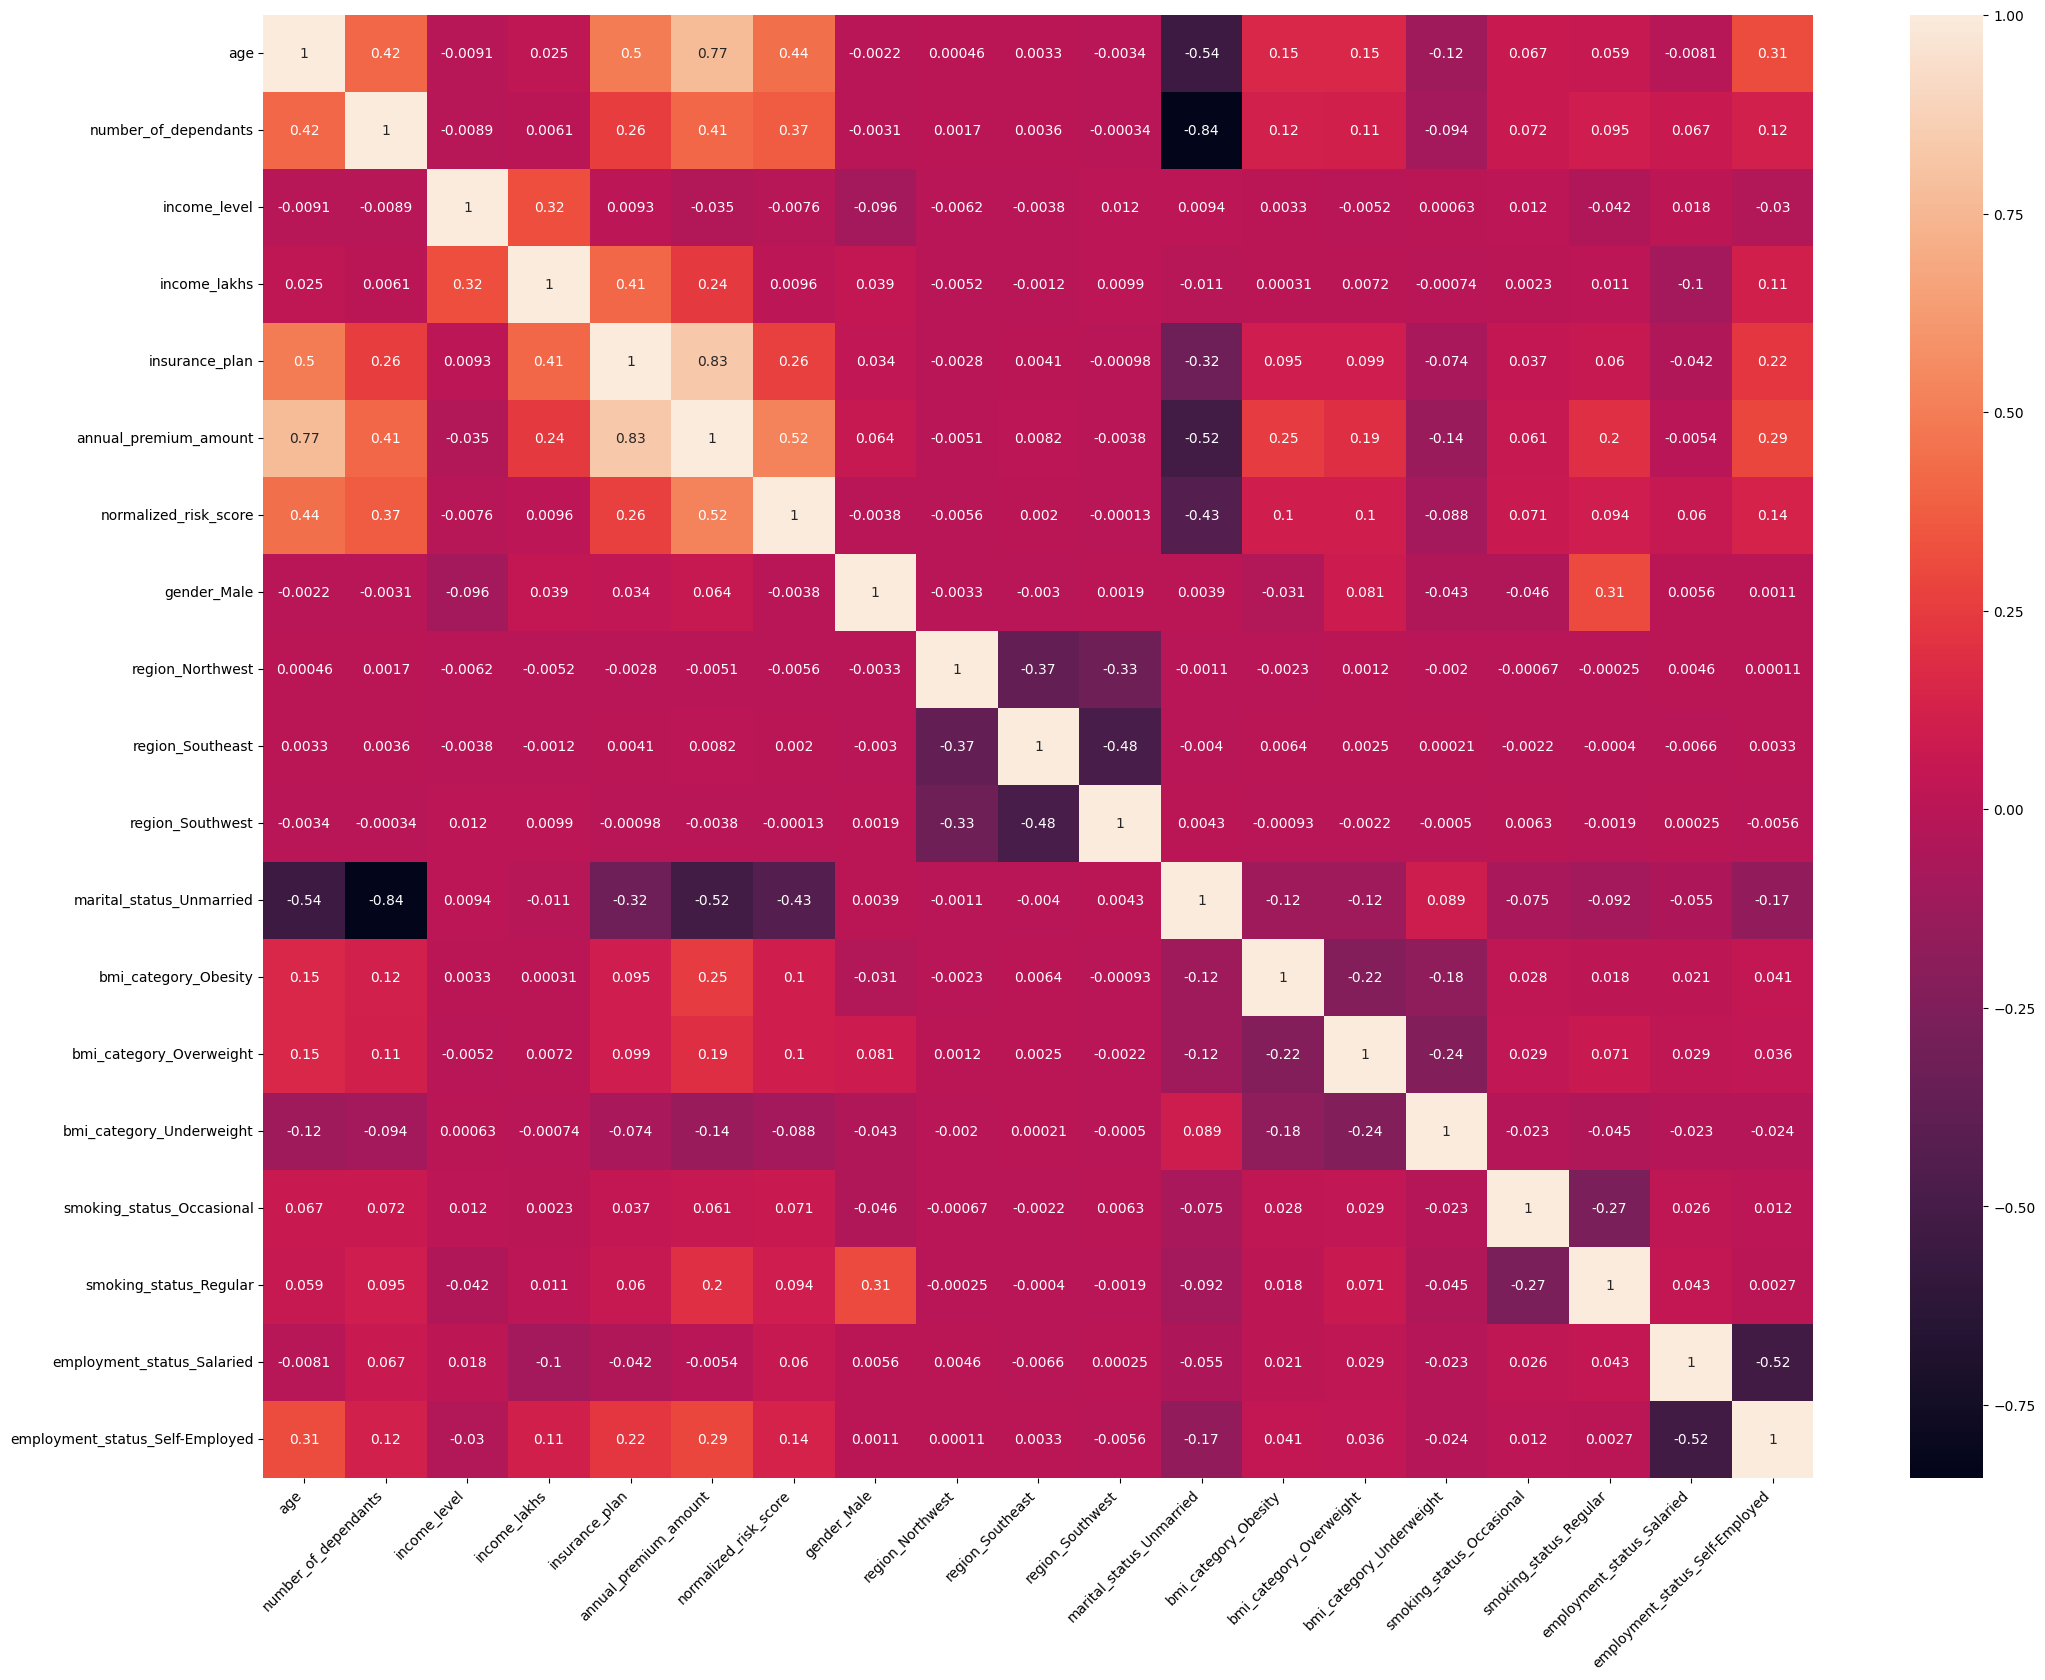

In [95]:
cm = df4.corr()
plt.figure(figsize=(25,19))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [96]:
X = df4.drop('annual_premium_amount', axis='columns')
y =df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.450349,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.344652,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.666667,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df = pd.DataFrame()
  vif_df['column'] = data.columns
  vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif_df

In [98]:
calculate_vif(X)

,column,VIF
0,age,4.613739
1,number_of_dependants,4.674756
2,income_level,3.013121
3,income_lakhs,2.898978
4,insurance_plan,3.523541
5,normalized_risk_score,2.690043
6,gender_Male,2.421998
7,region_Northwest,2.111620
8,region_Southeast,2.939732
9,region_Southwest,2.687811


In [99]:
calculate_vif(X.drop('income_level',axis='columns'))

,column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [100]:
X_reduced = X.drop('income_level',axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


### Model Training

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=10)


In [103]:
Model = LinearRegression()
Model.fit(X_train,y_train)
train_score = Model.score(X_train,y_train)
test_score = Model.score(X_test,y_test)

In [124]:
y_pred = Model.predict(X_test)

mse_lr  = mean_squared_error(y_test,y_pred)
rsme_lr = np.sqrt(mse_lr)
print("XGBoost ==> MSED : ",mse_lr, "RSME : ", rsme_lr)

XGBoost ==> MSED :  5165611.913027984 RSME :  2272.7982561212916


In [104]:
train_score,test_score

(0.9282143576916762, 0.9280547230217837)

In [105]:
Model.coef_

array([11160.92646188,  -676.44399066,  -514.22981577, 12557.01293645,
        4810.35770228,   168.64666183,   -35.7192924 ,    39.96512973,
         -24.65292857,  -935.76061134,  3387.91145477,  1599.36226775,
         391.1713038 ,   735.91227798,  2234.8047119 ,   155.9846743 ,
         415.90397305])

In [106]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

                                 Coefficients
marital_status_Unmarried          -935.760611
number_of_dependants              -676.443991
income_lakhs                      -514.229816
region_Northwest                   -35.719292
region_Southwest                   -24.652929
region_Southeast                    39.965130
employment_status_Salaried         155.984674
gender_Male                        168.646662
bmi_category_Underweight           391.171304
employment_status_Self-Employed    415.903973
smoking_status_Occasional          735.912278
bmi_category_Overweight           1599.362268
smoking_status_Regular            2234.804712
bmi_category_Obesity              3387.911455
normalized_risk_score             4810.357702
age                              11160.926462
insurance_plan                   12557.012936


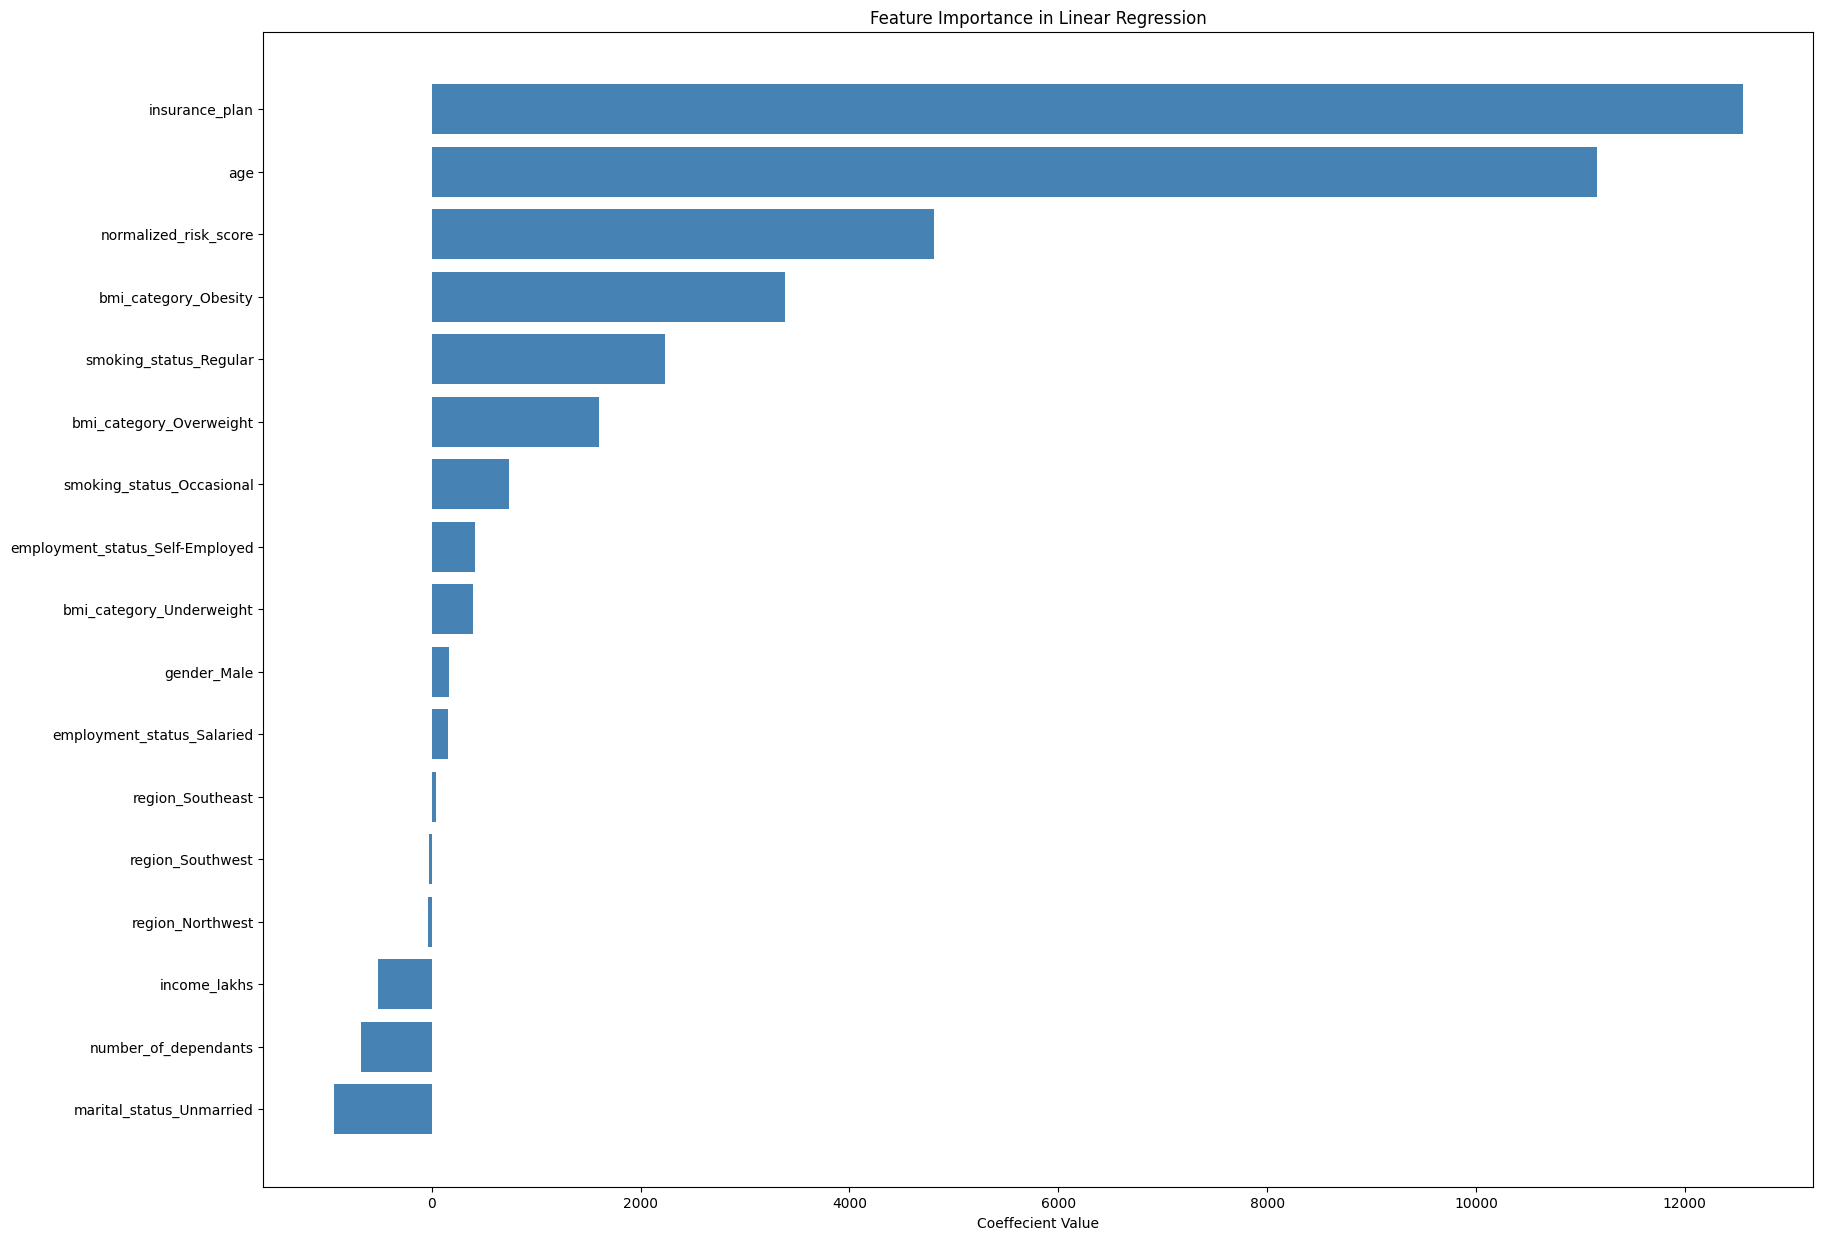

In [136]:
feature_importances = Model.coef_
coef_df = pd.DataFrame(feature_importances,index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)
print(coef_df)
plt.figure(figsize=(20,15))
plt.barh(coef_df.index,coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coeffecient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge model


In [117]:
Model_ridge = Ridge()
Model_ridge.fit(X_train,y_train)
train_score_ridge = Model_ridge.score(X_train,y_train)
test_score_ridge = Model_ridge.score(X_test,y_test)

In [118]:
train_score_ridge,test_score_ridge

(0.9282143198366275, 0.9280541644640345)

In [120]:
from xgboost import XGBRegressor

Model_boost = XGBRegressor()
Model_boost.fit(X_train,y_train)
train_score_boost = Model_boost.score(X_train,y_train)
test_score_boost = Model_boost.score(X_test,y_test)

In [121]:
train_score_boost,test_score_boost

(0.9860964417457581, 0.9809534549713135)

In [122]:
y_pred = Model_boost.predict(X_test)

mse_boost  = mean_squared_error(y_test,y_pred)
rsme_boost = np.sqrt(mse_boost)
print("XGBoost ==> MSED : ",mse_boost, "RSME : ", rsme_boost)

XGBoost ==> MSED :  1367525.625 RSME :  1169.4125127601467


In [126]:
Model_boost = XGBRegressor()
param_grid = {
  'n_estimators' : [20,40,50],
  'learning_rate' : [0.01,0.1,0.2],
  'max_depth' : [3,4,5]
}
random_search = RandomizedSearchCV(Model_boost,param_grid,n_iter=10,cv=3,scoring='r2',random_state=10)
random_search.fit(X_train,y_train)
random_search.best_score_

np.float64(0.9798195362091064)

In [127]:
random_search.best_params_

{'n_estimators': 20, 'max_depth': 5, 'learning_rate': 0.2}

In [128]:
best_model = random_search.best_estimator_

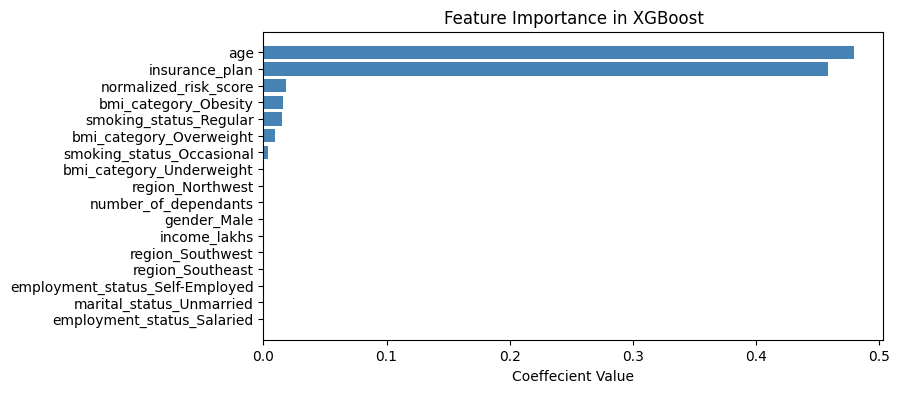

In [131]:
feature_importances = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importances,index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coeffecient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### ERROR ANALYSIS

In [141]:
y_pred = best_model.predict(X_test)
residuals = y_pred-y_test
residuals_pct = residuals*100/y_test
results_df = pd.DataFrame({
  'actual' : y_test,
  'prediction' : y_pred,
  'diff' : residuals,
  'diff_pct' : residuals_pct
})
print(results_df.head())

       actual    prediction         diff   diff_pct
3598    20554  20292.857422  -261.142578  -1.270520
35794   29647  28947.433594  -699.566406  -2.359653
43608   20560  20827.476562   267.476562   1.300956
42730    5018   7297.384277  2279.384277  45.424159
18936    8929   8264.611328  -664.388672  -7.440796


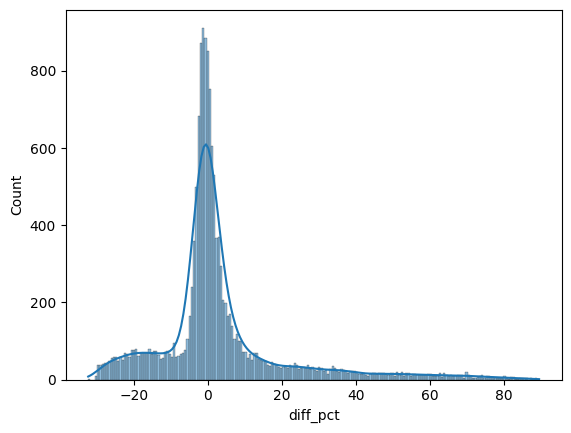

In [143]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [145]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(4609, 4)

In [146]:
results_df.shape

(14973, 4)

In [149]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

30.782074400587724

In [151]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,prediction,diff,diff_pct
36269,3501,6634.121094,3133.121094,89.492176
48801,3516,6634.121094,3118.121094,88.683763
42342,3521,6634.121094,3113.121094,88.415822
18564,3523,6634.121094,3111.121094,88.308859
7988,3527,6634.121094,3107.121094,88.095296
...,...,...,...,...
3097,4785,7184.744141,2399.744141,50.151393
22734,4420,6634.121094,2214.121094,50.093237
32900,4832,7251.983398,2419.983398,50.082438
37741,4421,6634.121094,2213.121094,50.059287


In [154]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0


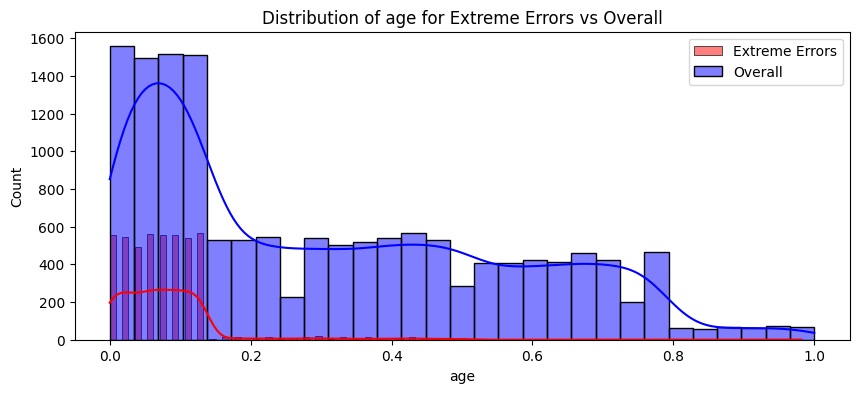

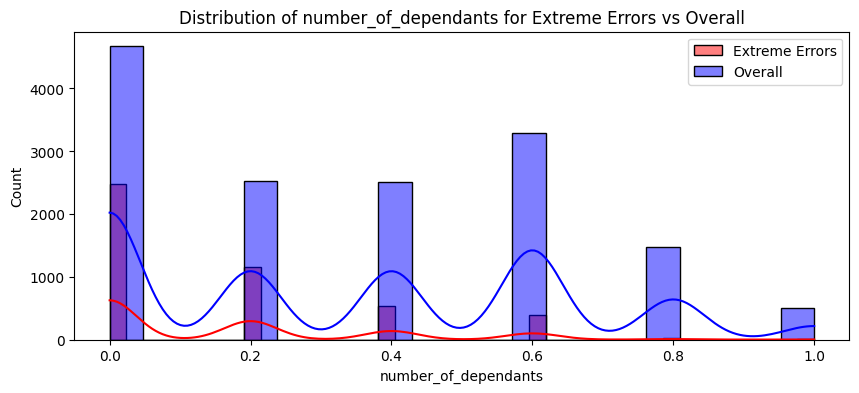

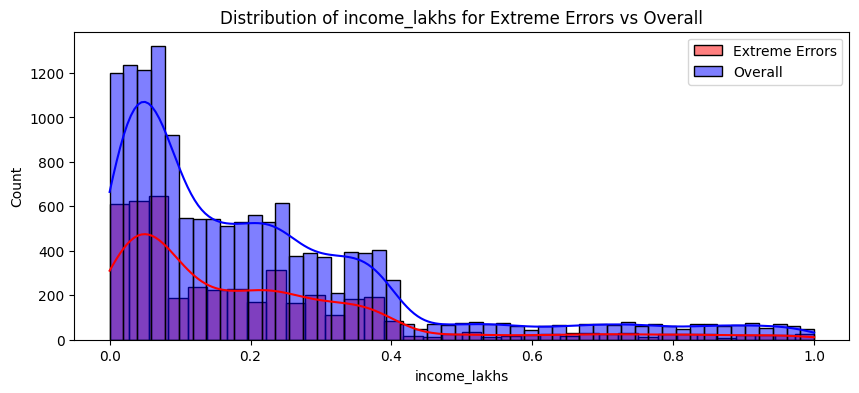

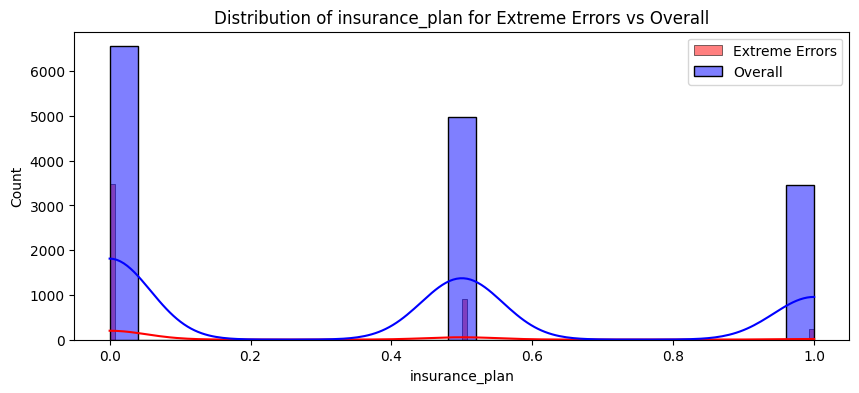

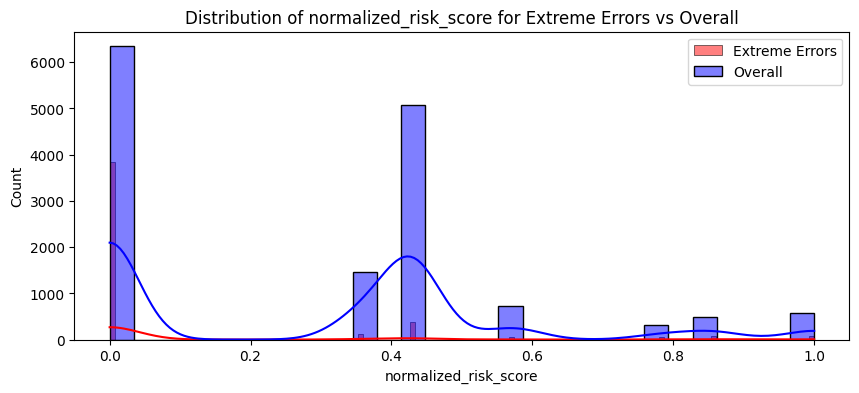

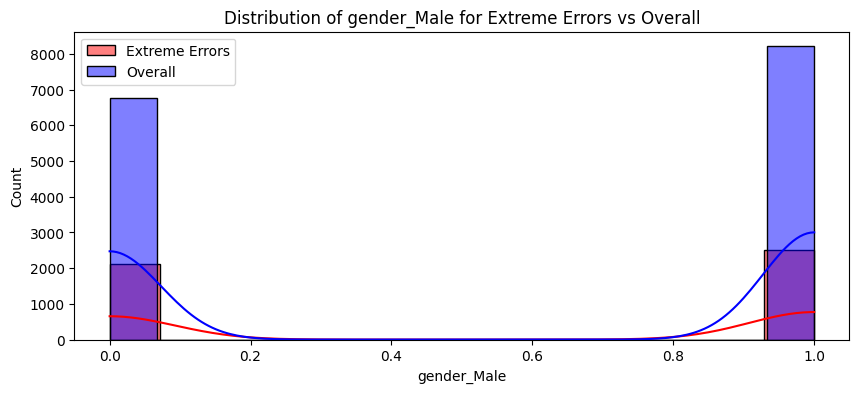

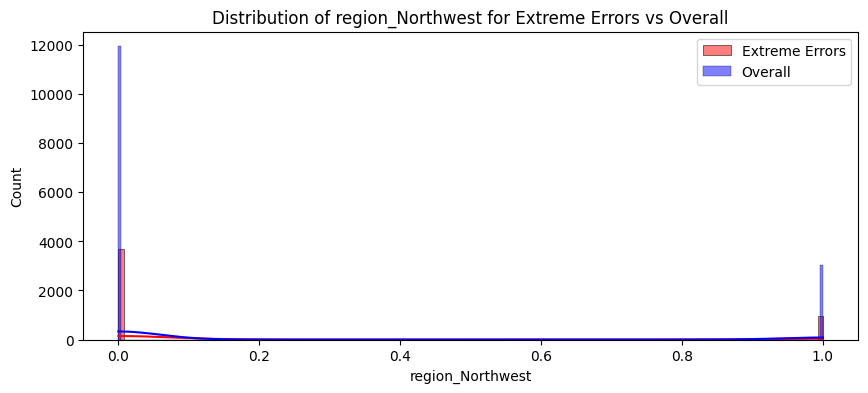

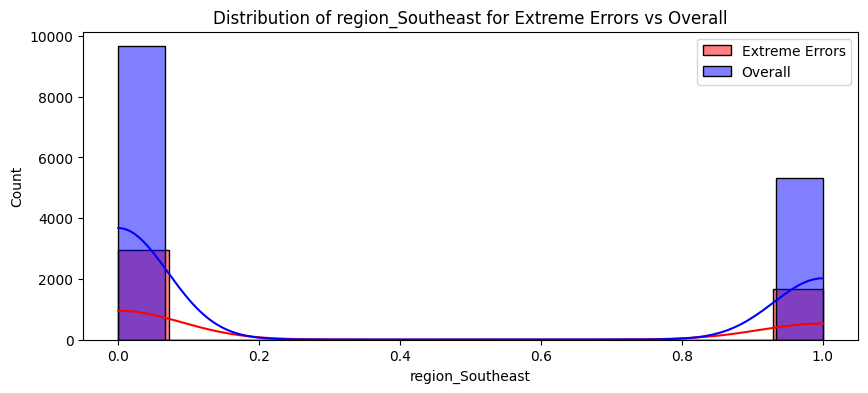

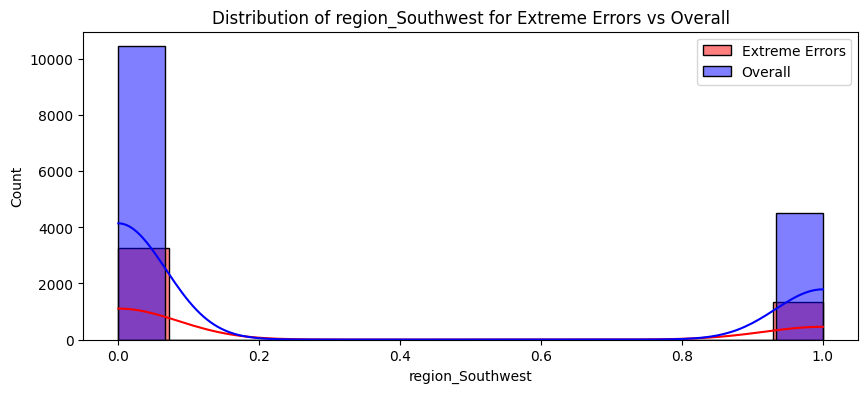

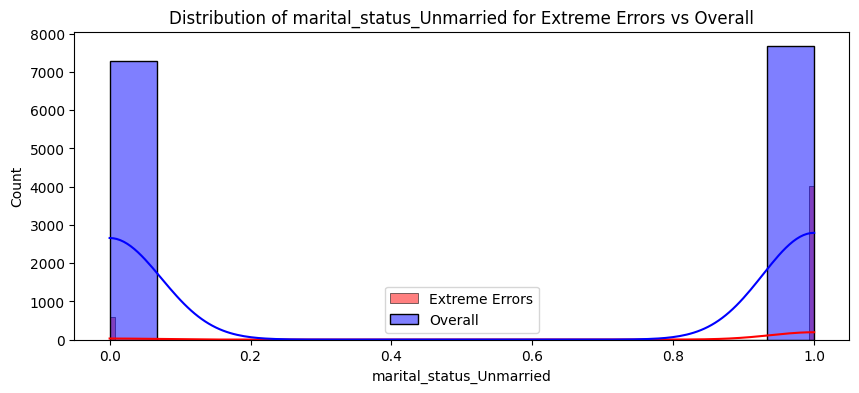

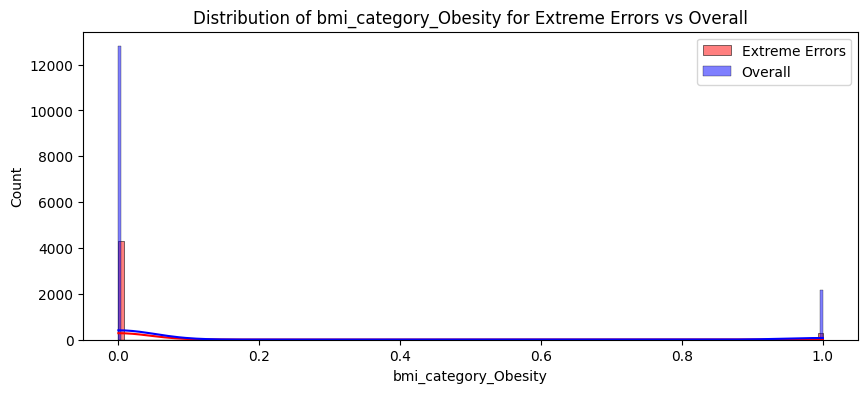

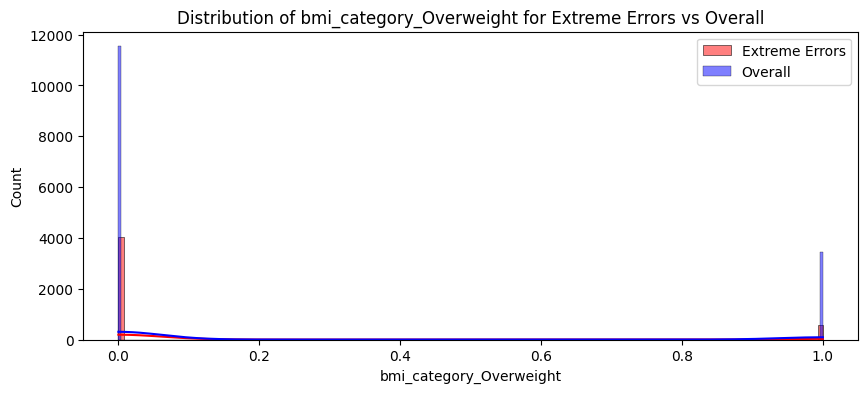

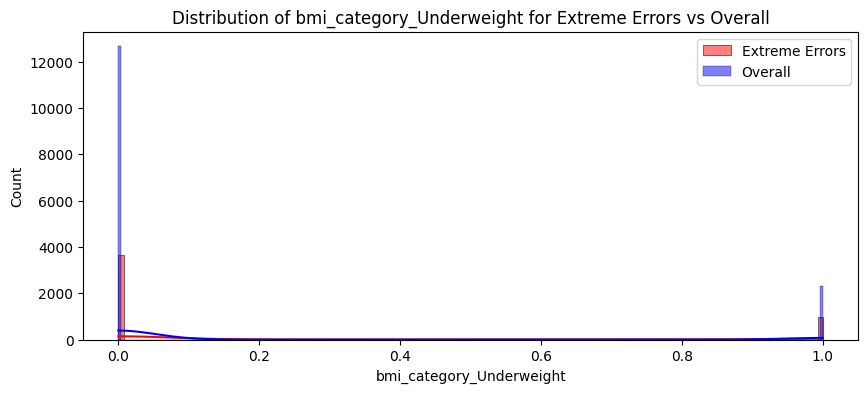

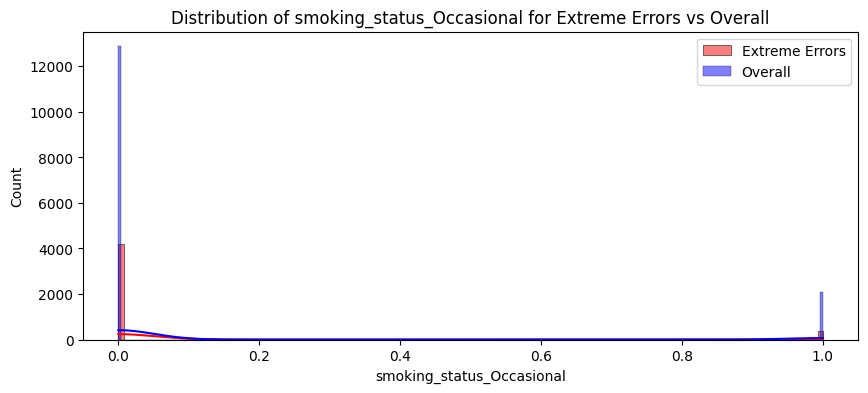

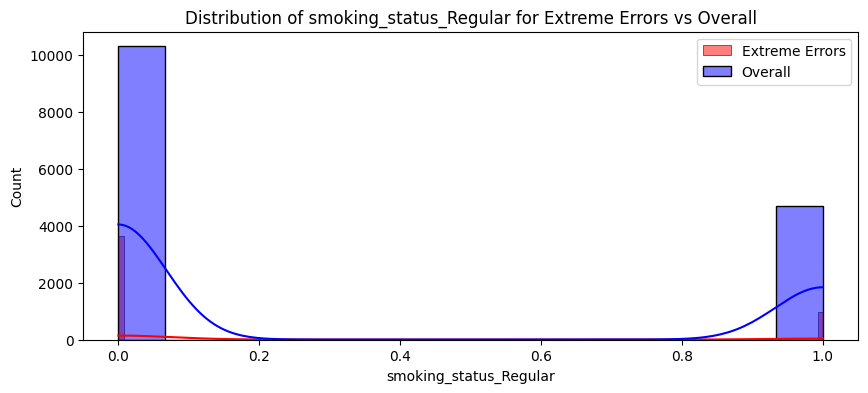

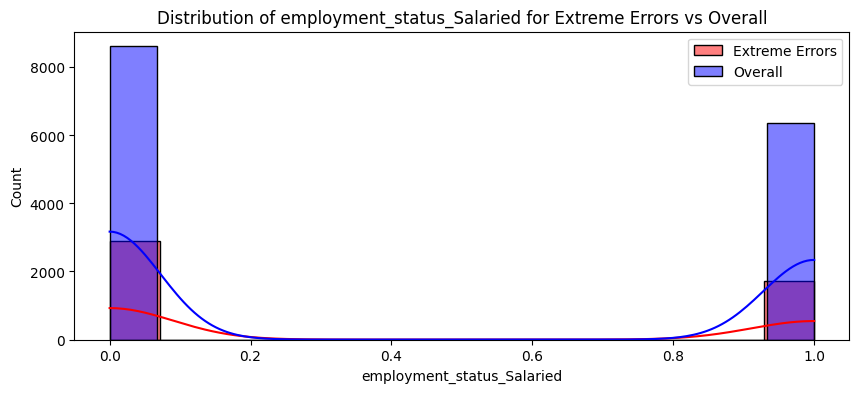

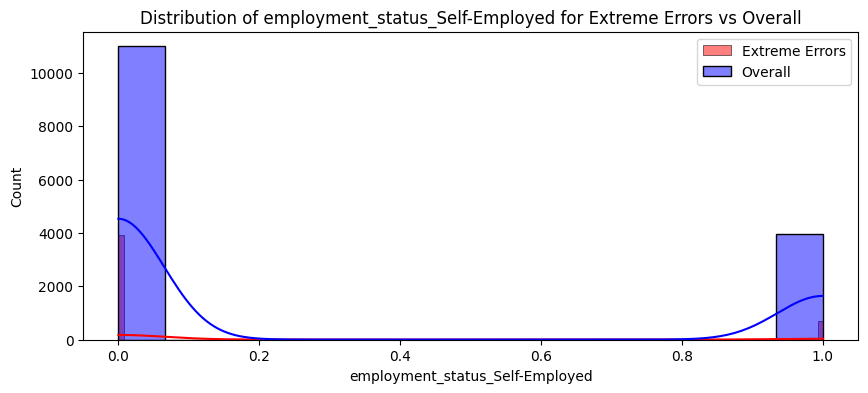

In [155]:
for feature in X_test.columns:
  plt.figure(figsize=(10, 4))
  sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
  sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
  plt.legend()
  plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
  plt.show()

### Reverse Scaling

In [157]:
extreme_errors_df['income_level']=-1

In [158]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-3.0,14.0,1.0
1,19.0,1.0,-3.0,4.0,1.0
2,18.0,1.0,-3.0,3.0,1.0
3,21.0,0.0,-3.0,25.0,1.0
4,24.0,1.0,-3.0,8.0,2.0


In [159]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4609.000000,4609.000000,4609.0,4609.000000,4609.000000
mean,22.296811,0.776524,-3.0,20.910393,1.297678
std,4.393660,1.015913,0.0,20.544540,0.556602
min,18.000000,0.000000,-3.0,1.000000,1.000000
25%,20.000000,0.000000,-3.0,6.000000,1.000000
50%,22.000000,0.000000,-3.0,15.000000,1.000000
75%,24.000000,1.000000,-3.0,29.000000,1.000000
max,71.000000,5.000000,-3.0,100.000000,3.000000


<Axes: xlabel='age', ylabel='Count'>

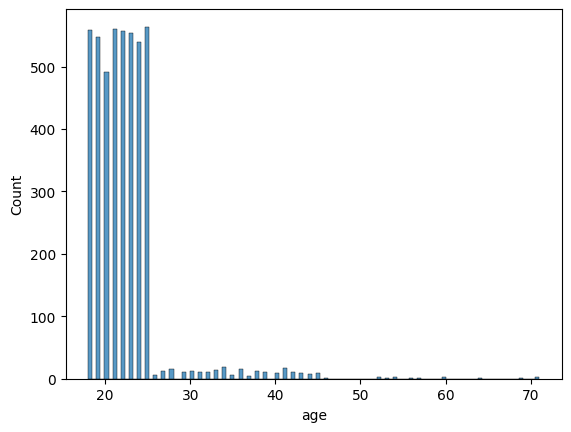

In [160]:
sns.histplot(df_reversed.age)

This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment